### Project: Sentiment Analysis and EDA for Amazon's Customers Reviews

#### Description:

> - I have performed EDA (Exploratory Data Analysis) and Sentiment Analysis on the below datasets to understand the sentiments of the customers reviews which further required to understand customers experiences and how the Amazon's vendors/sellers performing! Based on the KPIs of the business teams, these analyses helps to know the quality of products and sellers performance in the Amazon's e-commerce platform.
> - Sentiment analysis depends on their customers neutral or negative reviews. This helps to further investigate on products quality and improvise the sellers.
> - WHY: To maintain the stability and growth of sales as they are directly proportional to the quality of the products and sellers of a business, this contrubutes to expanding sales w.r.t new and return customers.
> - More non-positive reactions indicates that, those products/category needs attention to improvise on its quality checks.

> - The open-source datasets I have chosen are available at: 
    - https://snap.stanford.edu/data/web-Amazon.html
    - https://nijianmo.github.io/amazon/index.html#code
    - **Note**: These datasets available in category-wise with definition of each variables/columns.
    
> - **Nature of these datasets are available in compressed .json.gz format. So each products are available in category-wise with .json.gz format and I have converted three of the categories into individual .json files. Then I have merged .json files of all these selected three categories into **reviews_ori_data.json**. Then cleaned this dataset by skipping unwanted variables in each category and saved as 'software_products_cleaned.json', 'office_products_cleaned.json' and 'musical_instruments_cleaned.json' respectively**. 
    
#### Steps performed:
1. **EDA**: To understand the datasets and their structures along with what has happened from the available historical dataset i.e., Descriptive Data Analysis
2. **Data cleaning** and extracted the data and generated DataFrames for further purpose i.e., Sentiment Analysis
3. **Sentiment Analysis** to compute the average sentiment score of each product and each category

**Note**: I have installed and imported modules as and when required at the time of writing the code:

In [2]:
import pandas as pd

### I have extracted the below data from the above URLs and compiled these 3 selected categories to begin:

> - Above URLs provides separate json.gz file for each category.
> - Below are the categories 'musical_instruments', 'software_products' and 'office_products' I have compiled into 'reviews_ori_data.json', I have further sub-divided them into individual json datasets due to the scale of the json.gz files and for better reusability & maintainability purpose.
> - In the below json file, I have added each products-category as keys and list of each reviews as a list.
> - Stored the below 'reviews_ori_data.json' file to 'reviews_df' object using Pandas.

In [3]:
"""
To display the content of original dataset:
"""
reviews_df = pd.read_json('../datasets_raw/reviews_ori_data.json')
reviews_df

,musical_instruments,software_products,office_products
0,"{'overall': 5.0, 'verified': True, 'reviewTime...","{'overall': 5.0, 'vote': '2', 'verified': True...","{'overall': 2.0, 'verified': False, 'reviewTim..."
1,"{'overall': 5.0, 'vote': '3', 'verified': True...","{'overall': 5.0, 'verified': True, 'reviewTime...","{'overall': 5.0, 'vote': '5', 'verified': True..."
2,"{'overall': 5.0, 'verified': True, 'reviewTime...","{'overall': 4.0, 'verified': True, 'reviewTime...","{'overall': 5.0, 'verified': False, 'reviewTim..."
3,"{'overall': 4.0, 'verified': True, 'reviewTime...","{'overall': 5.0, 'verified': True, 'reviewTime...","{'overall': 5.0, 'vote': '3', 'verified': True..."
4,"{'overall': 3.0, 'vote': '4', 'verified': True...","{'overall': 3.0, 'verified': False, 'reviewTim...","{'overall': 4.0, 'vote': '96', 'verified': Fal..."
...,...,...,...
307,"{'overall': 5.0, 'verified': True, 'reviewTime...","{'reviewerID': 'A1OJ9V614SM587', 'asin': 'B000...","{'overall': 1.0, 'verified': True, 'reviewTime..."
308,"{'overall': 5.0, 'verified': True, 'reviewTime...","{'reviewerID': 'A2ETPOKJOA57W6', 'asin': 'B000...","{'overall': 4.0, 'verified': False, 'reviewTim..."
309,"{'overall': 3.0, 'verified': True, 'reviewTime...","{'reviewerID': 'AI6YOSOWFYF82', 'asin': 'B000E...","{'overall': 4.0, 'vote': '3', 'verified': True..."
310,"{'overall': 5.0, 'verified': True, 'reviewTime...","{'reviewerID': 'A1E3P6P5I9H215', 'asin': 'B000...","{'overall': 2.0, 'verified': True, 'reviewTime..."


### Data cleaning' for the above DataFrame 'reviews_ori_data':

> - Extract required features (columns/variables) and loaded into individual categorical JSON files for further Sentiment Analysis.
> - Also clean by removing the non-common features such as images uploaded by the users, verified and other variables since they are not required for our purpose. So for the data consistency and for the best results, retained the required variables such as review texts and product ids variables.
> - However in these review datasets, products ids are provided, to get the specific product names these needs to be mapped with the datasets of products!

> - After cleaning, I have saved the **software-products** category into individual dataset called **software_products_cleaned.json**.
> - Likewise, remaining categories such as **musical_instruments** & **office_products** can be categorized into individual datasets.

In [4]:
import json

In [5]:
"""
This function deletes unwanted variables/columns and saves the data of software_products key into software_products_cleaned.json 
file under the folder datasets_output.
"""

def del_key():
    with open('../datasets_raw/reviews_ori_data.json') as file:
        data = json.load(file)

        print("Number of musical_instruments products", len(data['musical_instruments']))
        print("Number of software_products products", len(data['software_products']))
        print("Number of office_products products", len(data['office_products']))

    for item in data['software_products']:

        # delete/remove unwanted columns/variables:
        for key_ in ['verified', 'reviewerName', 'reviewTime', 'unixReviewTime']:
            item.pop(key_)

        software_products = data['software_products']

    # create cleaned json dataset with only required variables into software_products_cleaned.json file:
    with open('../datasets_output/software_products_cleaned.json', 'w') as file:
        json.dump(software_products, file, indent=4)


del_key()

Number of musical_instruments products 312
Number of software_products products 312
Number of office_products products 312


### Performing EDA to understand about this dataset:

> - One review of one product per row

In [6]:
software_products_cleaned = pd.read_json('../datasets_output/software_products_cleaned.json')
software_products_cleaned

,overall,vote,reviewerID,asin,reviewText,summary,style
0,5,2.0,A3UI63EESKUYHU,0763855553,This is really a great buy. It breaks down to...,Excellent value,NaN
1,5,NaN,A318IDAWJ9ZYAY,0763855553,I have this running on my Macbook Air and two ...,Suits my personal and small business needs,NaN
2,4,NaN,ANGGNFE8DXGYC,0763855553,"not that easy to understand or install, docume...","not that easy to understand or install, docume...",NaN
3,5,NaN,A2N4QZL8L2NVKX,0763855553,"Works well! Use for Outlook and Word, Excel!",Excellent purchase for mutiple computer units.,NaN
4,3,NaN,A1EMDSTJDUE6B0,0763855553,We got this for 2 Macs and 2 Windows machines....,Endless Updates,NaN
...,...,...,...,...,...,...,...
307,5,NaN,A1OJ9V614SM587,B000EORV8Q,Worked great!,Nice buy.,NaN
308,5,NaN,A2ETPOKJOA57W6,B000EORV8Q,I give it a 5 star because it did increase ran...,I give it a 5 star because it did increase ...,NaN
309,5,NaN,AI6YOSOWFYF82,B000EORV8Q,EXCELLENT,Five Stars,NaN
310,5,NaN,A1E3P6P5I9H215,B000EORV8Q,Perfect for my needs. I used this cable to ext...,Great jumper cable,NaN


**Note**: Pandas will assign NaN (Not a Number) if the value is not entered or available in the specific cells. However in this context 'vote' variable is not required thus imputations for its missing values are not necessary here.

This dataset can be further cleaned to have only required variables such as 'reviewerID', 'asin (product_id)' and 'reviewText'.

#### Datatypes of each columns:

In [7]:
software_products_cleaned.dtypes

overall         int64
vote          float64
reviewerID     object
asin           object
reviewText     object
summary        object
style          object
dtype: object

#### Descriptive summary of numerical columns:

In [8]:
software_products_cleaned.describe()

,overall,vote
count,312.000000,27.000000
mean,4.846154,4.148148
std,0.677178,3.301558
min,1.000000,2.000000
25%,5.000000,2.000000
50%,5.000000,3.000000
75%,5.000000,4.500000
max,5.000000,17.000000


#### Shape of the DataFrame: Number of rows and columns.

> - Returns shape of DataFrame in tuple: 
    - number of rows: 312
    - number of columns: 7

In [9]:
software_products_cleaned.shape

(312, 7)

#### Information about DataFrame:

> - columns names & their quantity
> - number of non-null values/cells
> - data type of each columns
> - memory size occupied by dataset
> - count of each data type

**Note**: Pandas treats non-numerical values as object

In [10]:
software_products_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     312 non-null    int64  
 1   vote        27 non-null     float64
 2   reviewerID  312 non-null    object 
 3   asin        312 non-null    object 
 4   reviewText  312 non-null    object 
 5   summary     312 non-null    object 
 6   style       131 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 17.2+ KB


### Sentiment Analysis of Amazon's Customers Reviews:

> - Remove unwanted newline characters and empty spaces around the reviews text with the help of replace() method as below.
> - The Sentiment Score values ranges from 0 to 1.0

In [11]:
import nltk.sentiment

analyzer = nltk.sentiment.SentimentIntensityAnalyzer()

In [12]:
# Declaring variables to store all the cleaned features after every iteration:
users_review_text = []
products_id = []
sentiment_scores = []

In [13]:
with open('../datasets_output/software_products_cleaned.json') as file:
    data = json.load(file)

    for item in data:
        # review text
        review_text = item['reviewText']
        # print(review_text.replace("\n\n", " ").replace("  ", " "))
        users_review_text.append(review_text.replace("\n\n", " ").replace("  ", " "))

        # product_id
        product_id = item['asin']
        products_id.append(product_id)

        # analysing sentiment score
        scores = analyzer.polarity_scores(review_text)
        sentiment_score = scores['compound']
        
        # print("Sentiment score: ", sentiment_score)
        sentiment_scores.append(sentiment_score)

In [14]:
for text in users_review_text:
    print(text + '\n---')

This is really a great buy. It breaks down to a full MS Office software suite for 5 computers plus 1TB of online storage. The storage alone is worth the price. Well worth $100 per year, or less than $10 per month.
---
I have this running on my Macbook Air and two HP laptops. Set up took less than 3 minutes. It is a one year subscription which is totally fine with me considering it averages out to $20 per year.
---
not that easy to understand or install, documentation should be better.
---
Works well! Use for Outlook and Word, Excel!
---
We got this for 2 Macs and 2 Windows machines. It works OK on both platforms. I use it mostly on a Mac, now. I don't like that almost every time I go to use it, there's yet another update to go through. It's really annoying. We've since gone with the monthly online version.
---
What can you say great product.
---
Has been very helpful.
---
Complete rubbish! I got this with an Acer aspire laptop and installed it. There is no shortcut and double clicking 

In [15]:
for id_ in products_id:
    print(id_)

0763855553
0763855553
0763855553
0763855553
0763855553
0763855553
0763855553
0763855553
0763855553
0763855553
0763855553
0763855553
0763855553
0982697813
1413313701
1413313728
1426296355
1426296355
1600775411
1600775411
1600775411
1600775411
B00004W62O
B00004W62O
B00004W62O
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE
B000050ZRE

In [16]:
for senti_score in sentiment_scores:
    print(senti_score)

0.807
0.2716
0.1265
0.6892
-0.2892
0.6249
0.4754
-0.5707
0.5663
-0.8934
0.8268
-0.0418
0.9509
0.9602
0.6155
0.955
0.7345
0.5327
0.5548
0.9382
0.8139
0.775
0.8481
-0.7184
-0.1531
0.6656
0.6249
0.8803
0.9148
0.2732
0.6249
0.9465
0.4404
0.5709
0.3612
0.0
0.6486
0.7579
0.6468
0.6249
0.6249
0.4098
0.5719
0.7783
0.4404
-0.4153
0.8264
0.2023
0.0516
0.4927
0.6249
0.4753
0.5859
0.0
0.8519
0.6369
0.4404
0.5719
0.6588
0.74
0.8987
0.5719
0.6597
0.6588
0.6114
0.3595
0.0
0.6249
0.7906
0.0
0.5719
0.0
0.6249
0.6892
0.5719
0.4215
0.5423
0.6249
0.8652
-0.2942
0.6705
0.9571
0.7867
0.7269
-0.3818
0.5574
0.8342
-0.5574
0.9481
0.7047
0.5017
0.8777
0.1779
0.0
0.6369
0.9007
-0.4072
0.6369
0.4019
0.5267
0.1027
0.6908
0.6779
-0.4939
0.8378
0.8434
0.5719
0.9154
0.6997
0.4404
0.5382
0.5562
0.8221
0.875
0.7964
-0.1941
0.4588
0.2484
0.8481
0.7783
0.8977
0.6324
-0.274
0.6597
0.836
0.7264
0.7902
0.7338
0.6124
0.0
0.6124
-0.3274
0.8658
0.9184
0.9536
0.7629
0.749
0.9289
0.5548
0.875
0.9299
0.8104
0.8807
0.6114
0.6886
0

#### Now compiling all the above computed list variables into Pandas DataFrame

In [17]:
# Create a dictionary data:
data = {
    'product_id': products_id,
    'sentiment_score': sentiment_scores,
    'user_review': users_review_text
}

# Generate Pandas DataFrame:
software_products_reviews_df = pd.DataFrame(data)
print(software_products_reviews_df)

     product_id  sentiment_score  \
0    0763855553           0.8070   
1    0763855553           0.2716   
2    0763855553           0.1265   
3    0763855553           0.6892   
4    0763855553          -0.2892   
..          ...              ...   
307  B000EORV8Q           0.6588   
308  B000EORV8Q           0.7400   
309  B000EORV8Q           0.5719   
310  B000EORV8Q           0.6597   
311  B000EORV8Q           0.6588   

                                           user_review  
0    This is really a great buy. It breaks down to ...  
1    I have this running on my Macbook Air and two ...  
2    not that easy to understand or install, docume...  
3         Works well! Use for Outlook and Word, Excel!  
4    We got this for 2 Macs and 2 Windows machines....  
..                                                 ...  
307                                      Worked great!  
308  I give it a 5 star because it did increase ran...  
309                                          EXCELLENT

***
#### Save 'software_products_reviews_df' into .csv for further analysis and to plot graphs/charts

In [18]:
# Save the above generated sentiment scores data into CSV file:
software_products_reviews_df.to_csv('../datasets_output/software_products_sa_df.csv', index=None)

***

### Bar graph

> - To view the sentiment graph visually for which product has what sentiment score.
> - This Bar graph shows both positive and non-positive scores if any of the product received both.
> - Note that many users can write reviews on the same product!

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

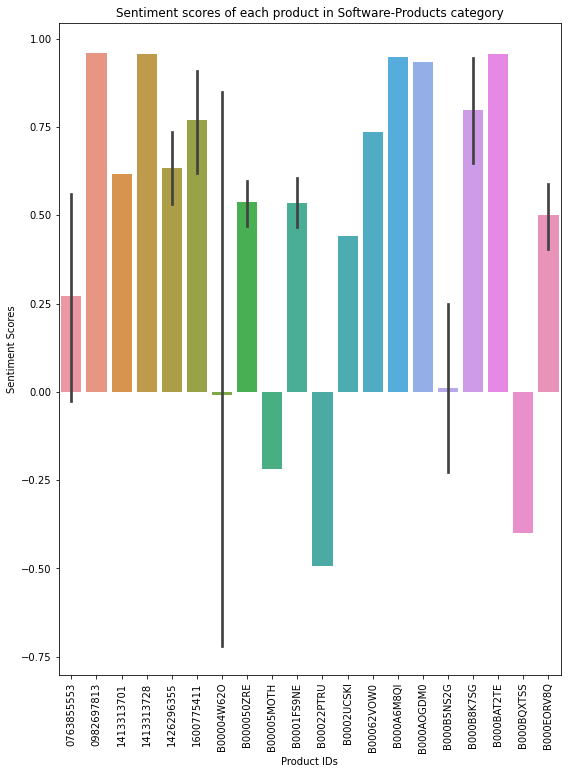

In [20]:
bar_graph_data = {
    'x': products_id,
    'y': sentiment_scores
}

plt.figure(figsize=(9, 12))
sns.barplot(x='x', y='y', data=bar_graph_data)
plt.title("Sentiment scores of each product in Software-Products category")
plt.xlabel("Product IDs")
plt.ylabel("Sentiment Scores")
plt.xticks(rotation=90);
# plt.ylim(0, 5)
# plt.savefig('software_products_senti_graph.png')

#### Key findings from this Bar graph:

> - Product IDs B00004W62O and B000B5NS2G have got all the three sentiment reactions such as positive, neutral and non-positive.
> - Product IDs B00005MOTH, B00022PTRU and B000BQXTSS have got only non-positive reactions.
    - So these 3 products needs attention on their quality checks & sellers or package/postage issues which depends on the brief of the review and further investigation why received such reactions from the customers.
> - 0982697813, 1413313728, 1600775411, B000A6M8QI, B000AOGDM0, B000B8K7SG, B000BAT2TE have got very positive reactions.
> - Remaining products have got bit more than mid range positive reactions.

In [21]:
# To know how many reviews per product_id:

print(software_products_reviews_df[['product_id']].value_counts())

product_id
B000050ZRE    130
B0001FS9NE    109
B000EORV8Q     36
0763855553     13
1600775411      4
B00004W62O      3
1426296355      2
B000B5NS2G      2
B000B8K7SG      2
1413313728      1
B00005MOTH      1
1413313701      1
0982697813      1
B0002UCSKI      1
B00062VOW0      1
B000A6M8QI      1
B000AOGDM0      1
B000BAT2TE      1
B000BQXTSS      1
B00022PTRU      1
dtype: int64


In [22]:
# To know the number of products in software category:

print("Number of products in Software-Products category:", len(software_products_reviews_df[['product_id']].value_counts()))

Number of products in Software-Products category: 20


#### Compute the average sentiment score for each product:

In [23]:
sentiment_avg_score = software_products_reviews_df.groupby('product_id').mean()[['sentiment_score']]  # returns df object
# sentiment_avg_score = reviews_df.groupby('product_id').mean().sentiment_score  # returns series object

In [24]:
# display type of 'sentiment_avg_score':
print(type(sentiment_avg_score))

<class 'pandas.core.frame.DataFrame'>


In [25]:
# display average sentiment score for each product_id:
print(sentiment_avg_score)

            sentiment_score
product_id                 
0763855553         0.272577
0982697813         0.960200
1413313701         0.615500
1413313728         0.955000
1426296355         0.633600
1600775411         0.770475
B00004W62O        -0.007800
B000050ZRE         0.537713
B00005MOTH        -0.217700
B0001FS9NE         0.535654
B00022PTRU        -0.493900
B0002UCSKI         0.440400
B00062VOW0         0.734600
B000A6M8QI         0.947600
B000AOGDM0         0.934100
B000B5NS2G         0.010700
B000B8K7SG         0.797300
B000BAT2TE         0.956400
B000BQXTSS        -0.400300
B000EORV8Q         0.499700


In [26]:
# convert average sentiment score to percentage and with two decimal values:
print(sentiment_avg_score.round({'sentiment_score': 2}) * 100)

            sentiment_score
product_id                 
0763855553             27.0
0982697813             96.0
1413313701             62.0
1413313728             96.0
1426296355             63.0
1600775411             77.0
B00004W62O             -1.0
B000050ZRE             54.0
B00005MOTH            -22.0
B0001FS9NE             54.0
B00022PTRU            -49.0
B0002UCSKI             44.0
B00062VOW0             73.0
B000A6M8QI             95.0
B000AOGDM0             93.0
B000B5NS2G              1.0
B000B8K7SG             80.0
B000BAT2TE             96.0
B000BQXTSS            -40.0
B000EORV8Q             50.0


### Code:
> - This code is available in my GitHub repository @ https://github.com/rnedesigns/cip_eda_sa_project

### Summary: 

**Insights from this EDA & Sentiment Analysis**:

**EDA**:
> - Helped to understand information about the variables/columns in the raw dataset such that required variables can be extracted for the Sentiment Analysis
> - Missing values can be computed for the required variables
> - Knowing basic information such as number of records & variables, descriptive statistical values of numerical variables
> - Confirm the right data types of each variables and format them if they are not rightly considered. Ex: date values can be treated as object (string) type in Pandas by default.
> - Based on the scale/type of dataset, sub divide them into respective datasets. Ex: I have performed in this analysis by sub-setting the dataset into category-wise JSON files - that helps for the maintainability of the code, however each of the outputs can be merged/joined into single dataset and reports can be generated accordingly!

**Sentiment Analysis (SA)**:
> - Helped to understand the sentiment score for each review for each products and categories
> - Bar graph shows the customers sentiment reactions for each products of specific category
> - From the bar graph and computed 'average_sentiment_score' we can say that: 
    - product_ids B00004W62O, B00005MOTH, B00022PTRU and B000BQXTSS products need attention as they have negative sentiment scores. 
    - product_ids 0763855553 and B0002UCSKI are doing below average.
    - product_ids with the average score of 50.00 and above are doing good.
    - These are key findings can be found from the sentiment analysis to understand the products/sellers as they are key factors for the sales aspects of business
> - SA helps know, how each product or seller performing to improve on the sales aspects of the e-commerce platform
> - It further contributes to Amazon's business team to help maintain and increase the sales growth and their any future expansions w.r.t new and returning customers!

> - **Further to this, Amazon's products dataset can be mapped/merged with the dataset I have generated from this Sentiment Analysis to know the name of each product**.

**Notes**:
> - The above execution steps are common to perform the sentiment analysis & EDA on other products-category reviews thus these can be further refactored into functions-based code-base and pass in other products category as argument into caller functions to get these reults.
> - My this approach can be further optimized with the tools to accommodate large scale datasets as in .json.gz files.
> - Possible next scope of my project: To build the Text Classifier model using Deep Learning algorithm to determine/predict the sentiment of texts from similar datasets and apply Predictive Data Analysis and/or Prescriptive Data Analysis